In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## 한글 사용을 위한 페키지##
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.width', 1000)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,868 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
from sklearn.linear_model import LinearRegression

study_hour = [[2],[5],[1],[7],[3],[4],[17],[6],[8],[5]]
class_pass = [0,1,0,1,0,0,1,1,1,0]

lr = LinearRegression()

train_X = study_hour
train_Y = class_pass

lr.fit(train_X, train_Y)

LinearRegression()

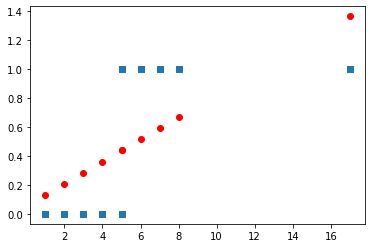

In [5]:
lr.score(train_X,train_Y)

pred_Y = lr.predict(train_X)
plt.scatter(train_X,train_Y, marker='s')
plt.scatter(train_X,pred_Y, color='red')

plt.show()

In [6]:
test_X = [[4.5],[5.5]]
pred_Y = lr.predict(test_X)
print(pred_Y)

[0.39977974 0.47687225]


In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

train_X = study_hour
train_Y = class_pass

lr.fit(train_X, train_Y)

LogisticRegression()

In [8]:
print(lr.score(train_X,train_Y))

pred_Y = lr.predict(train_X)
print(list(pred_Y))
print(train_Y)

0.9
[0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
[0, 1, 0, 1, 0, 0, 1, 1, 1, 0]


In [9]:
test_X = [[4.5],[5.5]]
pred_Y = lr.predict(test_X)
print(pred_Y)

[0 1]


In [16]:
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
0           0       3    male  22.0      1      0   7.2500        S   Third    man        True  NaN  Southampton    no  False
1           1       1  female  38.0      1      0  71.2833        C   First  woman       False    C    Cherbourg   yes  False
2           1       3  female  26.0      0      0   7.9250        S   Third  woman       False  NaN  Southampton   yes   True
3           1       1  female  35.0      1      0  53.1000        S   First  woman       False    C  Southampton   yes  False
4           0       3    male  35.0      0      0   8.0500        S   Third    man        True  NaN  Southampton    no   True
..        ...     ...     ...   ...    ...    ...      ...      ...     ...    ...         ...  ...          ...   ...    ...
886         0       2    male  27.0      0      0  13.0000        S  Second    man        True  NaN  Southampton    no

In [41]:
dataset = titanic.copy()

dataset.drop(['class','who','deck','embark_town','alive'],axis=1,inplace=True)
dataset.drop_duplicates(inplace = True)
print(dataset.count())
print(dataset.info())

survived      780
pclass        780
sex           780
age           676
sibsp         780
parch         780
fare          780
embarked      778
adult_male    780
alone         780
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    780 non-null    int64  
 1   pclass      780 non-null    int64  
 2   sex         780 non-null    object 
 3   age         676 non-null    float64
 4   sibsp       780 non-null    int64  
 5   parch       780 non-null    int64  
 6   fare        780 non-null    float64
 7   embarked    778 non-null    object 
 8   adult_male  780 non-null    bool   
 9   alone       780 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 56.4+ KB
None


In [42]:
def encoding_sex(x):
  if x == 'male':
    return 0
  else:
    return 1

def encoding_embarked(x):
  if x == 'S':
    return 0
  elif x == 'C':
    return 1
  else:
    return 2

def encoding_adult_male(x):
  if x == True:
    return 1
  else:
    return 0

def encoding_alone(x):
  if x == True:
    return 1
  else:
    return 0

dataset['sex'] = dataset['sex'].apply(encoding_sex)
dataset['embarked'] = dataset['embarked'].apply(encoding_embarked)
dataset['alone'] = dataset['alone'].apply(encoding_alone)
dataset['adult_male'] = dataset['adult_male'].apply(encoding_adult_male)

In [43]:
trainset = dataset.iloc[150:]
testset = dataset.iloc[:150]

print(trainset.mean())
print(testset.mean())

survived       0.426984
pclass         2.207937
sex            0.376190
age           30.219654
sibsp          0.500000
parch          0.419048
fare          36.265979
embarked       0.341270
adult_male     0.571429
alone          0.574603
dtype: float64
survived       0.353333
pclass         2.406667
sex            0.366667
age           28.053780
sibsp          0.633333
parch          0.413333
fare          28.794249
embarked       0.400000
adult_male     0.586667
alone          0.533333
dtype: float64


In [44]:
print(trainset.isna().sum())
print(testset.isna().sum())

survived       0
pclass         0
sex            0
age           81
sibsp          0
parch          0
fare           0
embarked       0
adult_male     0
alone          0
dtype: int64
survived       0
pclass         0
sex            0
age           23
sibsp          0
parch          0
fare           0
embarked       0
adult_male     0
alone          0
dtype: int64


In [45]:
trainset.dropna(inplace=True)
testset.dropna(inplace=True)
print(trainset.count())
print(testset.count())

survived      549
pclass        549
sex           549
age           549
sibsp         549
parch         549
fare          549
embarked      549
adult_male    549
alone         549
dtype: int64
survived      127
pclass        127
sex           127
age           127
sibsp         127
parch         127
fare          127
embarked      127
adult_male    127
alone         127
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [46]:
res = trainset.corr()
print(res['survived'])

survived      1.000000
pclass       -0.401491
sex           0.509082
age          -0.082350
sibsp        -0.015502
parch         0.086772
fare          0.297462
embarked      0.103253
adult_male   -0.530561
alone        -0.217397
Name: survived, dtype: float64


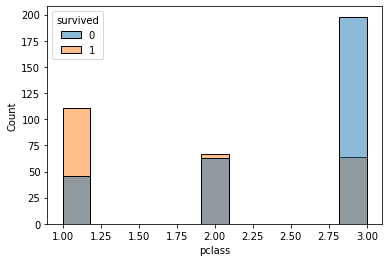

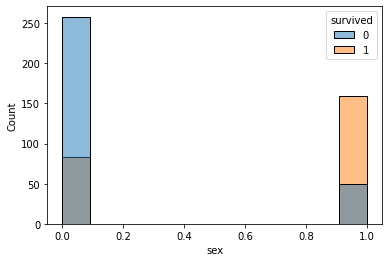

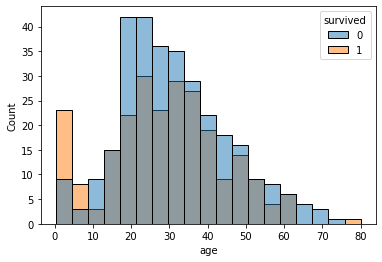

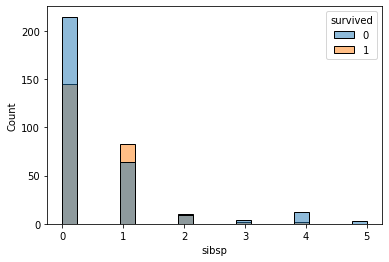

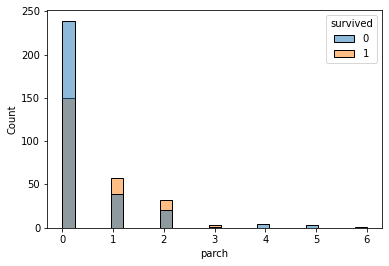

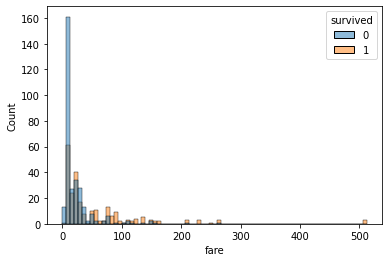

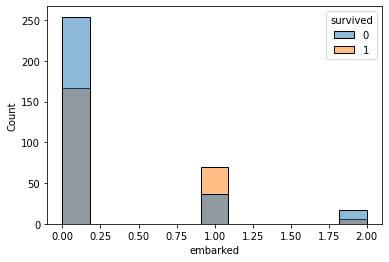

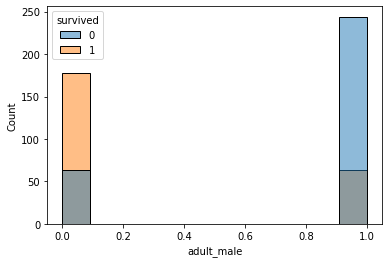

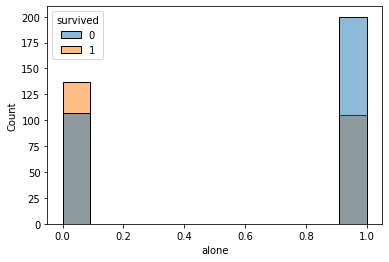

In [47]:
for c in trainset.columns:
  if c != 'survived':
    sns.histplot(x = c, hue='survived', data=trainset)
    plt.show()

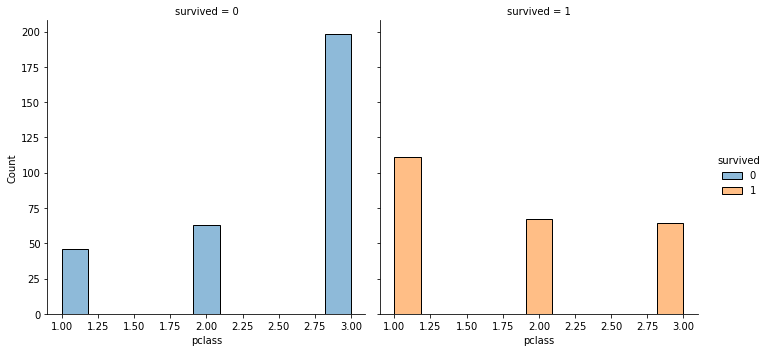

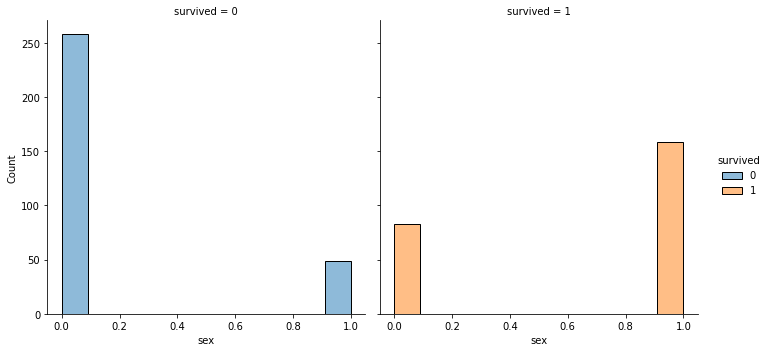

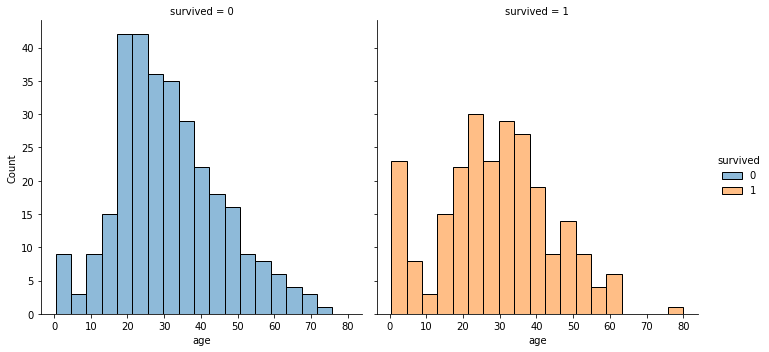

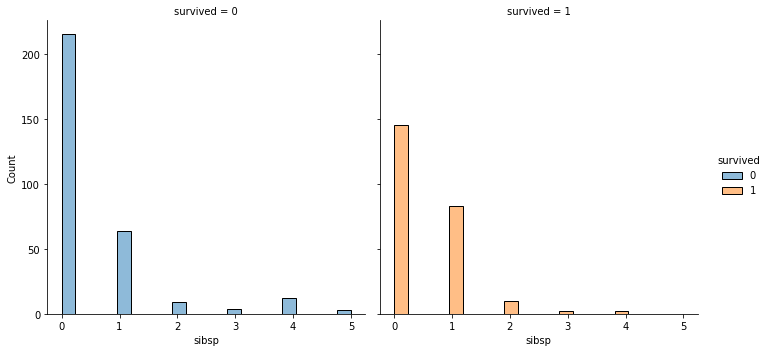

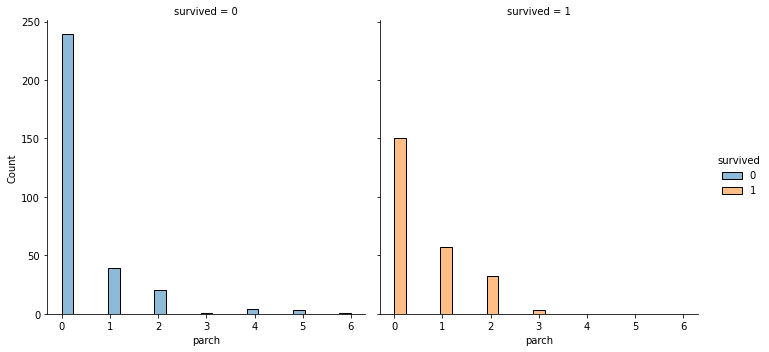

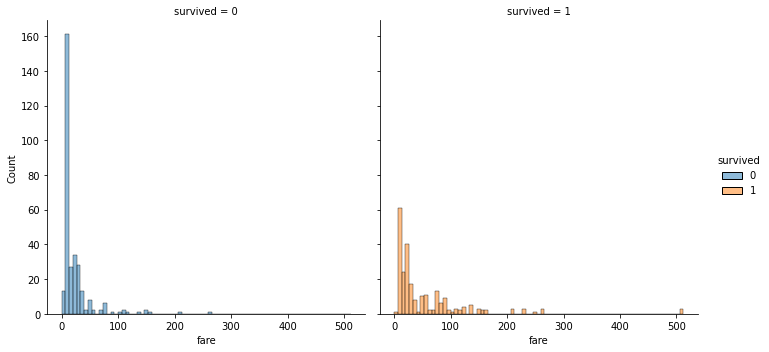

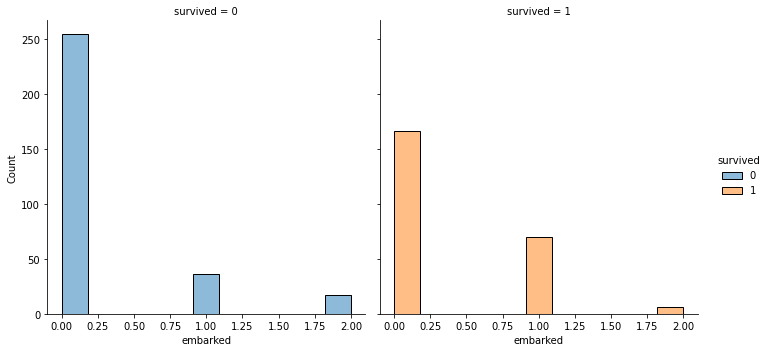

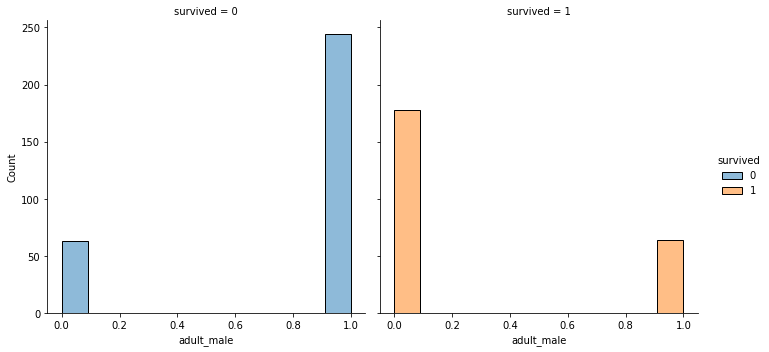

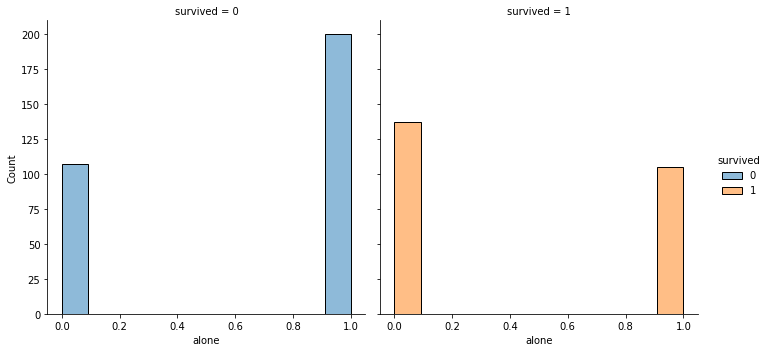

In [48]:
for c in trainset.columns:
  if c != 'survived':
    sns.displot(x=c, col='survived',hue='survived', data = trainset)
    plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression

#학습 최대 횟수를 기본값 100에서 300으로 변경
lr = LogisticRegression(max_iter = 300)

train_X = trainset.drop(['survived'], axis = 1)
train_Y = trainset['survived']
test_X = testset.drop(['survived'], axis = 1)
test_Y = testset['survived']

lr.fit(train_X, train_Y)
print(lr.score(train_X,train_Y))
print(lr.score(test_X,test_Y))

0.8105646630236795
0.8031496062992126


In [53]:
print(lr.coef_)

coeff = pd.Series(data = lr.coef_[0], index = train_X.columns)
print(coeff.sort_values(ascending=False))

[[-1.15388331  0.41996327 -0.03024565 -0.62060609 -0.43242452  0.0036257
   0.00703928 -2.21347505 -0.77219266]]
sex           0.419963
embarked      0.007039
fare          0.003626
age          -0.030246
parch        -0.432425
sibsp        -0.620606
alone        -0.772193
pclass       -1.153883
adult_male   -2.213475
dtype: float64


In [54]:
columns = ['pclass','sex','age','sibsp','parch','fare','adult_male']
train_X = trainset[columns]
train_Y = trainset['survived']
test_X = testset[columns]
test_Y = testset['survived']

lr.fit(train_X,train_Y)
print(lr.score(train_X, train_Y))
print(lr.score(test_X,test_Y))

0.8214936247723132
0.8267716535433071


In [55]:
trainset = dataset.iloc[150:].copy()
trainset.fillna(trainset['age'].mean(), inplace=True)
columns = ['pclass','sex','age','sibsp','parch','fare','adult_male']
train_X = trainset[columns]
train_Y = trainset['survived']

In [57]:
lr.fit(train_X, train_Y)
print(lr.score(train_X,train_Y))
print(lr.score(test_X,test_Y))

0.8
0.8346456692913385
